<a href="https://colab.research.google.com/github/Sandeep-Suthar9467/DA-Lab/blob/main/LAB6_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [21]:
# load data and get some basic information about it...
data_set = pd.read_csv('spam.csv')
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [22]:
# let's show how the dataset look like.
data_set.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


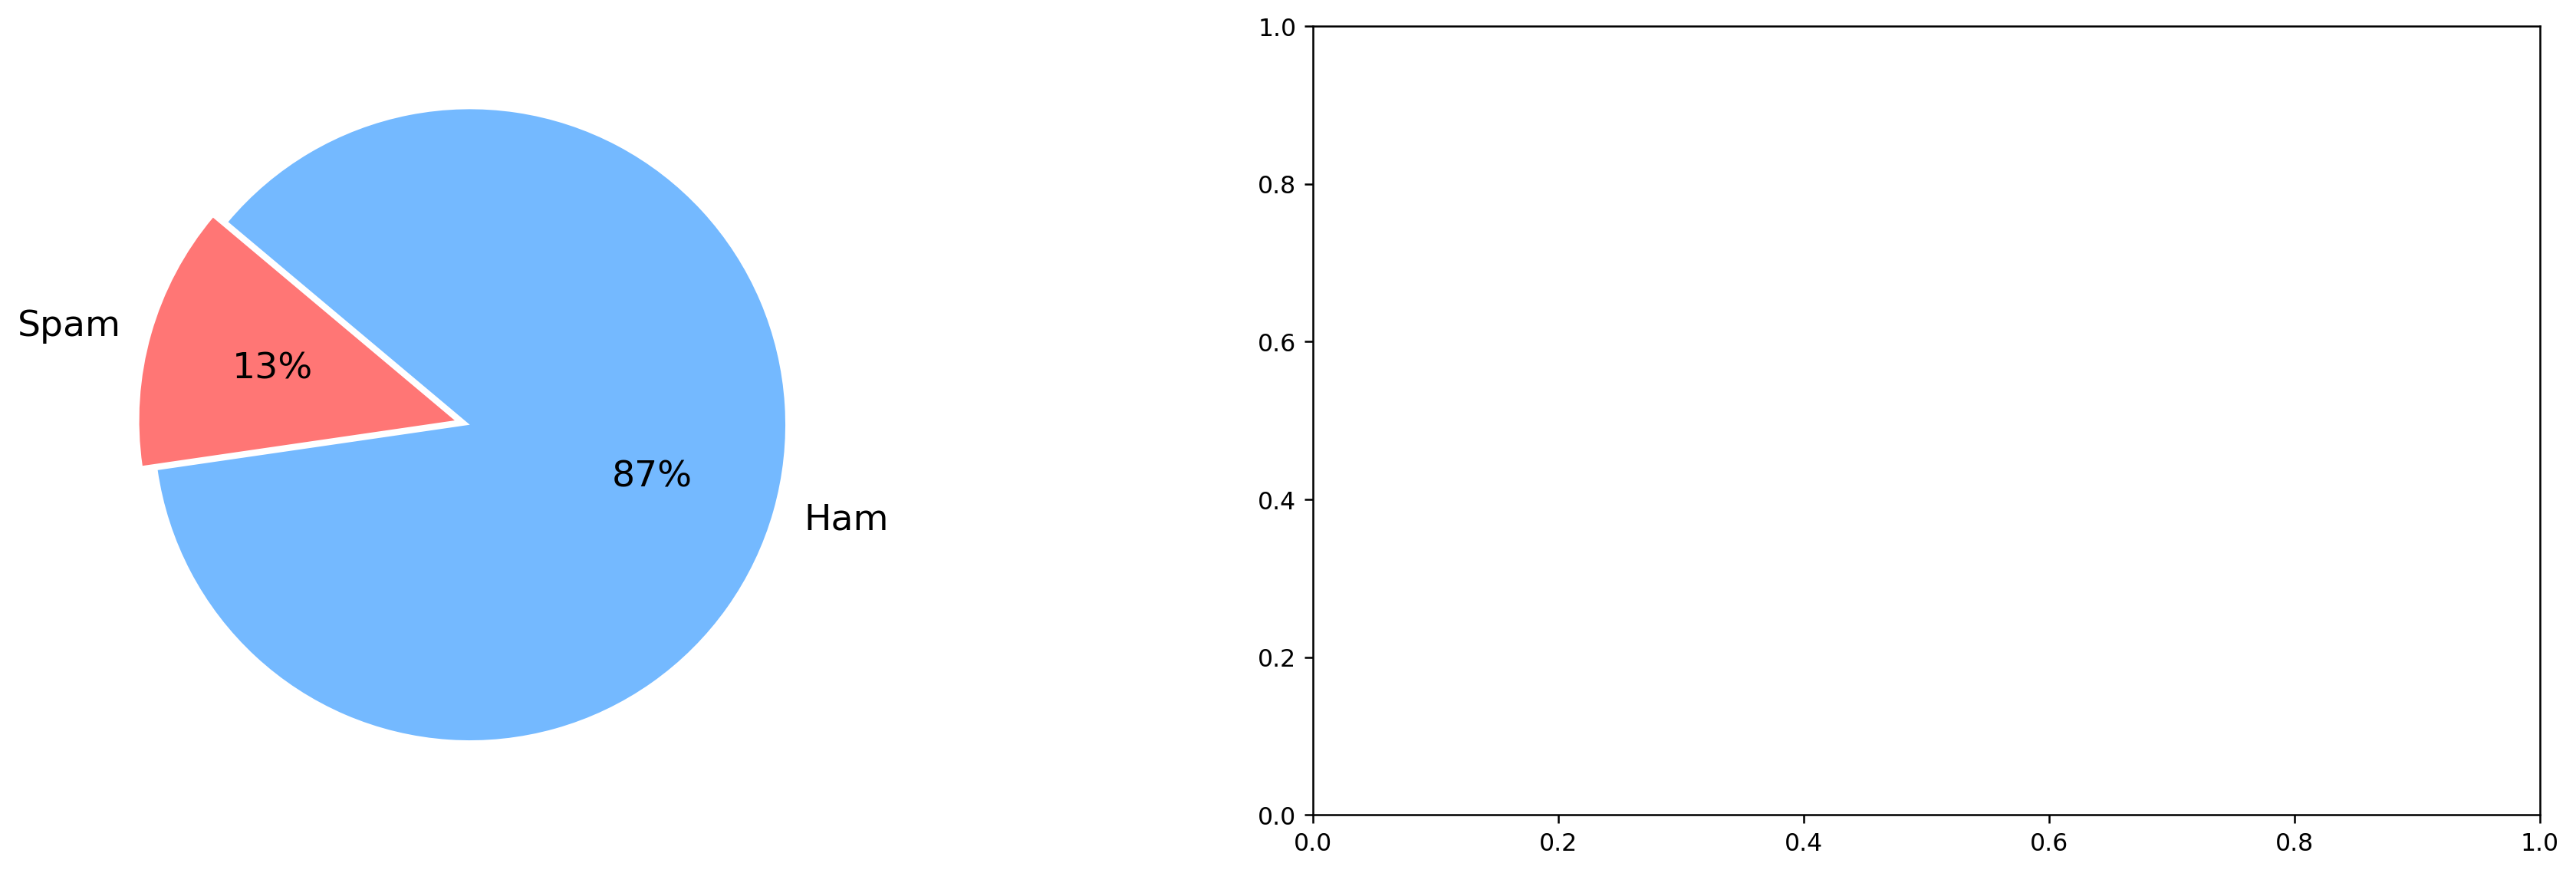

In [24]:
data_set.shape
data_set['Category'].value_counts()
labels = ['Spam', 'Ham']
sizes = [747, 4825]
custom_colours = ['#ff7675', '#74b9ff']
plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140,
autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])
plt.subplot(1, 2, 2)

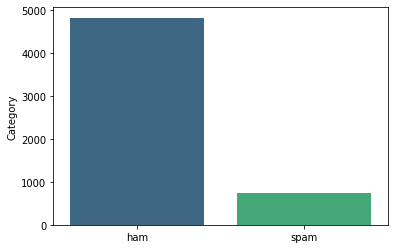

,Category,Message,Total Words,Total Chars
0,ham,"Go until jurong point, crazy.. Available only ...",20,92
1,ham,Ok lar... Joking wif u oni...,6,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,128
3,ham,U dun say so early hor... U c already then say...,11,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,49


In [28]:

sns.barplot(x = data_set['Category'].unique(), y = data_set['Category'].value_counts(), palette=
'viridis')
plt.show()
data_set['Total Words'] = data_set['Message'].apply(lambda x: len(x.split()))
def count_total_words(text):
  char = 0
  for word in text.split():
    char += len(word)
  return char
data_set['Total Chars'] = data_set["Message"].apply(count_total_words)
data_set.head()

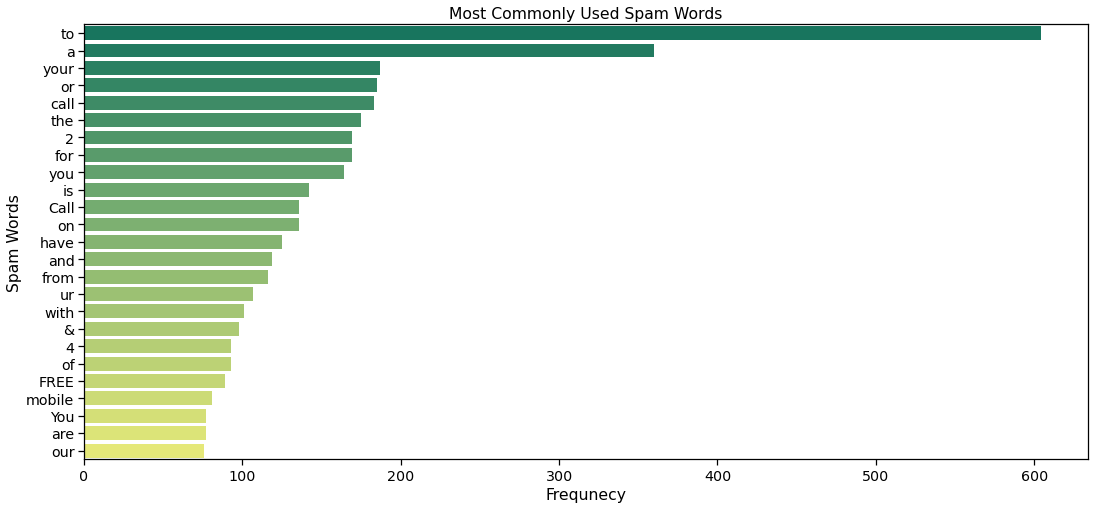

In [31]:
data_set['Category'] = data_set['Category'].replace({'spam':0,'ham':1})
all_spam_words = []
for sentence in data_set[data_set['Category'] == 0]['Message'].to_list():
  for word in sentence.split():
    all_spam_words.append(word)
df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word',
'Frequency'])
sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Spam Words")
plt.show()
all_ham_words = []
for sentence in data_set[data_set['Category'] == 1]['Message'].to_list():
  for word in sentence.split():
    all_ham_words.append(word)

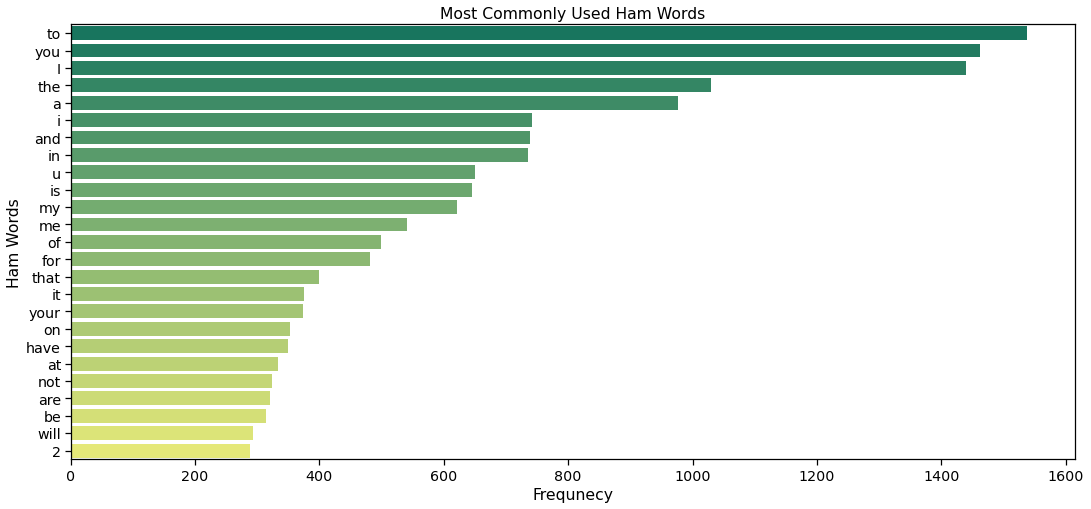

In [32]:
df = pd.DataFrame(Counter(all_ham_words).most_common(25), columns= ['Word',
'Frequency'])
sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Ham Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_set['Message'], data_set['Category'],
random_state=1)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b',
lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
word_freq_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(85.18, 0.5, 'predicted label')

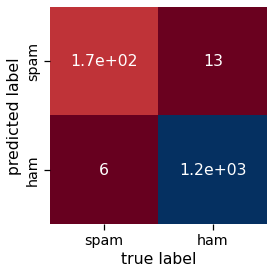

In [34]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['spam', 'ham'], yticklabels=['spam', 'ham'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [35]:

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions))
print('Recall score: ', recall_score(y_test, predictions))
print("F1 score: ",f1_score(y_test, predictions))

Accuracy score:  0.9863603732950467
Precision score:  0.9893004115226337
Recall score:  0.9950331125827815
F1 score:  0.9921584812216261
